This notebook is just for revisiting SGD and playing around with some animation.

In [0]:
# Magic command
%matplotlib inline
# Import dependencies
from fastai.basics import *

The goal of linear regression is to fit a line through a set of points.

In [2]:
n = 100
# make a matrix of dimensions nx2 containing ones
x = torch.ones(n, 2)
x[:, 0].uniform_(-1, 1.) # Put random numbers from a uniform distribution in first column
x[:5]

tensor([[ 0.3229,  1.0000],
        [ 0.3924,  1.0000],
        [ 0.7009,  1.0000],
        [-0.2010,  1.0000],
        [ 0.5916,  1.0000]])

In [3]:
# The first element is such that it will become the slope and the second the intercept 
a = tensor(3., 2); a

tensor([3., 2.])

In [4]:
a.shape, x.shape

(torch.Size([2]), torch.Size([100, 2]))

In [0]:
# Matrix multiplication between x and a and adding random numbers in those values
y = x@a + torch.rand(n)


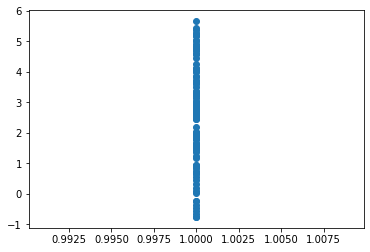

In [6]:
plt.scatter(x[:, 1], y)

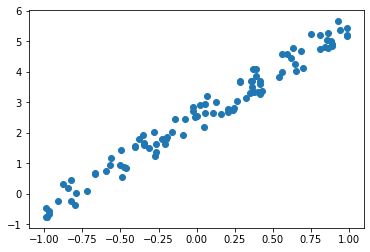

In [7]:
plt.scatter(x[:, 0], y)

The above points appear to be scattered around a line. And it actually is since we just multiplied two matrices to get the points in the line and added random numbers to let it get scatterd around it.

You want to find **parameters** (weights) `a` such that you minimize the error between the points and the line x@a. Note that here `a` is unknown. For a regresssion problem the most common error function or loss function is the **mean squared error**.

In [0]:
def mse(y_hat, y): return ((y_hat-y)**2).mean()

Suppose we believe `a = (-1.0, 1.0)` then we can compute `y_hat` which is our prediction and then compute our error.

In [0]:
a = tensor(-1, 1.)

In [15]:
y_hat = x@a
mse(y_hat, y)

tensor(8.0747)

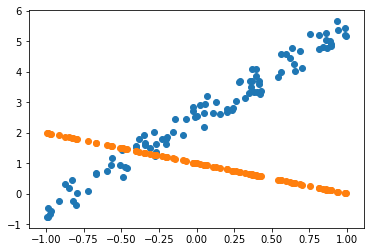

In [16]:
plt.scatter(x[:, 0], y)
plt.scatter(x[:, 0], y_hat)

So far we have specified the model (linear regression) and the evaluation criteria (or loss function). Now we need to handle optimization; that is, how do we find the best values for `a`? How dow we find the best fitting linear regression. 

**Gradient Descent** 

We would like to find the values of `a` that would minimize `mse_loss`.

Gradient Descent is an algorithm that minimizes functions. Given a function defined by a set of parameters, gradient descent starts with an initial set of parameter values and iteratively moves toward a set of parameter values that minimize the function. This iterative mimimization is achieved by taking steps in the negative direction of the function gradient.

Here is gradient descent implememnted in [Pytorch](http://pytorch.org/).

In [17]:
a = nn.Parameter(a); a

Parameter containing:
tensor([-1.,  1.], requires_grad=True)

In [0]:
def update():
    y_hat = x@a
    loss = mse(y_hat, y)
    if t % 10 == 0: print(loss)
    loss.backward()
    with torch.no_grad():
        a.sub_(lr*a.grad)
        a.grad.zero_()

In [19]:
lr = 1e-2
for t in range(100): update()

tensor(8.0747, grad_fn=<MeanBackward0>)
tensor(6.4182, grad_fn=<MeanBackward0>)
tensor(5.1902, grad_fn=<MeanBackward0>)
tensor(4.2629, grad_fn=<MeanBackward0>)
tensor(3.5494, grad_fn=<MeanBackward0>)
tensor(2.9903, grad_fn=<MeanBackward0>)
tensor(2.5442, grad_fn=<MeanBackward0>)
tensor(2.1826, grad_fn=<MeanBackward0>)
tensor(1.8851, grad_fn=<MeanBackward0>)
tensor(1.6373, grad_fn=<MeanBackward0>)


In [20]:
lr = 1e-1
for t in range(100): update()

tensor(1.4288, grad_fn=<MeanBackward0>)
tensor(0.4179, grad_fn=<MeanBackward0>)
tensor(0.1702, grad_fn=<MeanBackward0>)
tensor(0.1063, grad_fn=<MeanBackward0>)
tensor(0.0898, grad_fn=<MeanBackward0>)
tensor(0.0855, grad_fn=<MeanBackward0>)
tensor(0.0844, grad_fn=<MeanBackward0>)
tensor(0.0841, grad_fn=<MeanBackward0>)
tensor(0.0840, grad_fn=<MeanBackward0>)
tensor(0.0840, grad_fn=<MeanBackward0>)


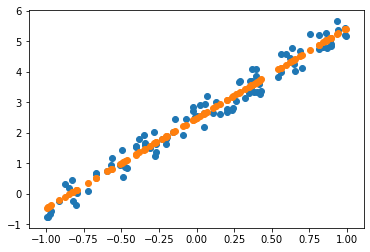

In [21]:
plt.scatter(x[:, 0], y)
plt.scatter(x[:, 0], x@a)

Now we animate it!

In [0]:
from matplotlib import animation, rc
# This tells matplotlib to render and show the animation in html
rc('animation', html='jshtml') 

In [23]:
doc(rc)

In [0]:
?rc

In [55]:
a = nn.Parameter(tensor(-1., 1))

fig = plt.figure()
plt.scatter(x[:, 0], y, c='orange')

# plt.plot returns a list of .Line2D objects representing the plotted data
# Putting the ',' in the left side tells python to unoack the list and just assign the values to the variables mentioned
# and since there ais only one .line2D object it get assigned to variable 'line'

# Equivalent code
# line = plt.plot(x[:, 0], x@a)[0]
line, = plt.plot(x[:, 0], x@a)

# This tells plt to close itself and just do the animation
# Otherwise you would see another plot
plt.close()

def animate(i):
    update()
    line.set_ydata(x@a)
    return line 

# Note = In python first positional arguments are written and then keyword arguments
# Arguments
# fig - The figure object that is used to get draw, resize, and any other needed events.
# animate - It is the function that is called every frame to update the frame.
# np.arange(0, 100) - It is the number of frames. If an iterable, 
#   then simply use the values provided to pass to the function argument.
# interval - Delay between frames in milliseconds. Deafults to 200.

animation.FuncAnimation(fig, animate, np.arange(0, 100), interval=20)

In [0]:
?plt.plot

In [0]:
?animation.FuncAnimation

In [56]:
type(line)

list

In practice, we don't calculate on the whole file at once, but we sue mini-batches.